In [28]:
# Downloads the data and fixes the column naming schema

import pandas as pd
import os
def Download():
    # Download the input file
    print('downloading the input files')
    import urllib.request
    urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx','online_retail_II.xlsx')
    urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx','online_retail.xlsx')

def ConvertCsv():
    # Download and covert the columns, etc
    print('downloading the data...')
    Download()
    print('Reading in the data...')
    df=pd.read_excel('online_retail_II.xlsx')
    df2=pd.read_excel('online_retail.xlsx')
    # make sure to harmonize the data columns
    df2.columns=['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','Price', 'Customer ID', 'Country']

    df3 = pd.concat([df,df2])
    df3.to_csv('online_combined.csv')
    
# reading xlxs is very slow, so we convert this to csv
print('')
print('Reading xlxs is very slow, so we convert this to csv')
if not os.path.exists('online_combined.csv'):
    ConvertCsv()


Reading xlxs is very slow, so we convert this to csv
downloading the data...
downloading the input files
Reading in the data...



Check for other null entries by column. The rest is corrupted data and would exclude for future analysis.
Column: Unnamed: 0 and the number corrupted: 0
Column: Invoice and the number corrupted: 0
Column: StockCode and the number corrupted: 0
Column: Description and the number corrupted: 4382
Column: Quantity and the number corrupted: 0
Column: InvoiceDate and the number corrupted: 0
Column: Price and the number corrupted: 0
Column: Customer ID and the number corrupted: 243007
Column: Country and the number corrupted: 0
Column: totalcost and the number corrupted: 0

Fill the null users to check how big they are overall
also noted that some of the descriptions are corrupted. Given this is a short project and the size is small, I will ignore any corrupted item descriptions.

Brief summary for future analysis. I wanted to know how many users IDs are missing as well as how many customers, items, and invoices there are. 
Unique purchases: 5699
Unique customers: 5943
Unregistered purchases:

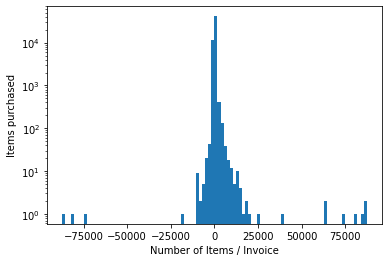


I want to see what was cancelled with more than 75000 items. It was one customer.
         Unnamed: 0  Quantity  Price  Customer ID  totalcost  nullID
Invoice                                                             
C524235    16184340    -87167   6.81     642465.0  -11880.84       0
C541433       61624    -74215   1.04      12346.0  -77183.60       0
C581484      540422    -80995   2.08      16446.0 -168469.60       0

has this customer ordered many times? Below is their list of orders for Customer ID 642465.0

 printing the list of orders
 This customer only ordered once and cancelled their order. Given the size of this order, I would reach out to this person to find out what shaped their decision and to see if something would change their mind about cancelling.
         Unnamed: 0  Quantity  Price  Customer ID  totalcost  nullID
Invoice                                                             
518505     13452075     87167   6.81     642465.0   11880.84       0
C524235    16

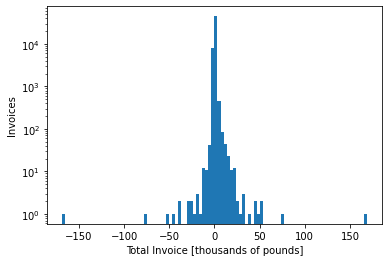


Many of these large cancellations are from new customers. Might want to double check the quantity with the user before they finish their order? Perhaps the website can be improved

Printing invoices with more than 20k pounds worth returned
         Unnamed: 0  Quantity     Price  Customer ID  totalcost  nullID
Invoice                                                                
A506401      179403         1 -53594.36          0.0  -53594.36       1
A516228      276274         1 -44031.79          0.0  -44031.79       1
A528059      403472         1 -38925.87          0.0  -38925.87       1
C512770      241824        -1  25111.09      17399.0  -25111.09       0
C537630      532969        -2  27082.66          0.0  -27082.66       2
C537644      535402        -2  26949.58          0.0  -26949.58       2
C537651      535650        -2  27082.66          0.0  -27082.66       2
C541433       61624    -74215      1.04      12346.0  -77183.60       0
C550456      800715     -9014     15.80

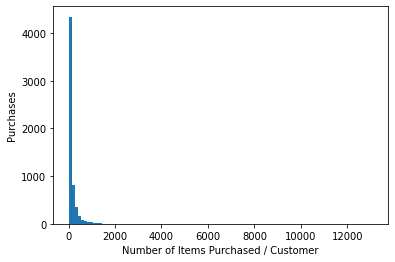



 I divide the customers into the number of of items purchased. This is useful to see the distribution with fewer categories of customers. This grouping could be used potentially to define levels of customers for rewards, which I discuss more below.
 In this distribution, I note the very small number of customers who have made more than 500 purchases. The next distribution is to look at the gross revenue from these different categories of customers.
 1st time customers are pretty low, which means that customers very often make additional orders. It might be worth surveying to understand why the 1st time customers were unhappy.

splitting customers based upon their number of orders


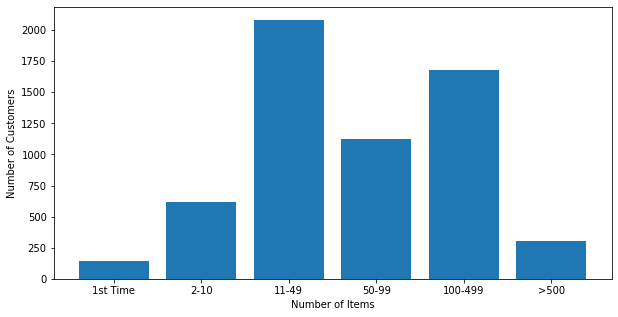

 Beyond the types of customers, the revenue broken down by number of customer orders is shown.
 Customers with more than 100 orders make up 82% of the total revenue. The customers with more than 500 orders have a gross revenue of more than 2 million pounds. 
 We need to make sure to keep these repeat customers with more than 100 orders happy and especially those with more than 500 orders
 Grouping by their number number of items is a good way to target consumers. Better deals should be targeted at consumers with more than 100 orders to keep them coming back.
 First time users are also a group to continue to grow.


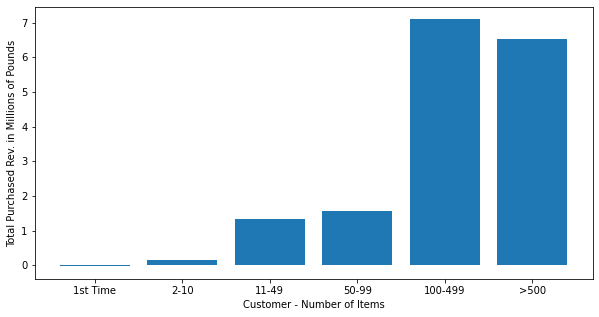

Total Revenue from >100 orders: 0.8180918409067731
 See where the revenue per country
 More than 90% of the revenue is coming from the UK. There are smaller orders from a lot of countries.
 If looking to expand from the UK (although this would need to be investigated with Brexit), then the EIRE, Netherlands, Germany, and France would be the best places to start advertising


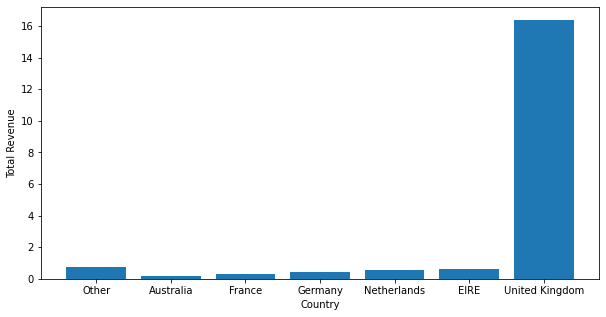

Total Revenue from >100 orders: 0.8180918409067731

 How many items are ordered per month? Same for revenue. This code draws these distributions

The number of items ordered increased greatly near December for holiday purchases. More staff may be needed to process these orders
 The peak number of items ordered is also increasing from Dec 2011 to Dec 2012. April is lower in 2011 than 2010, which might be interesting to investigate further


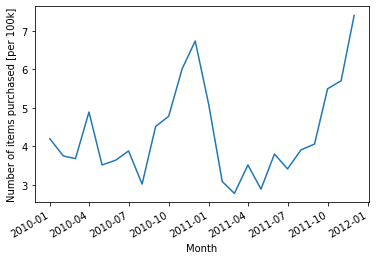

Total revenue is also strongly peaked starting in October through January. The difference in April 2010 versus April 2011 is gone, which may be an artifact of the large cancelled orders


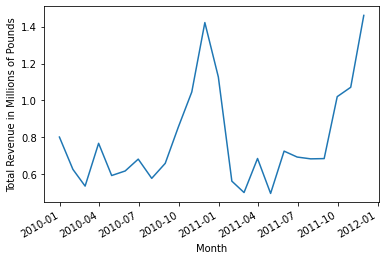


Drawing the number of items per invoice. Again large numbers of items in a single invoice might be a concern for cancelled orders, which show up as negative entries.


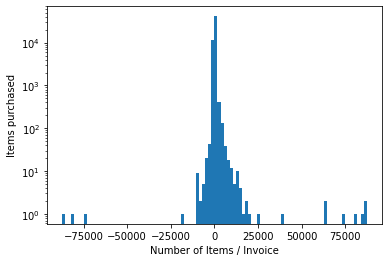

In [21]:
# This code will go through the EDA and provide insights, 
# which I put in the comments as well as the printout.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
draw=True
verbose=False
def Download():
    # Download the input file
    import urllib.request
    urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx','online_retail_II.xlsx')
    urllib.request.urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx','online_retail.xlsx')

def ConvertCsv():
    print('downloading the data...')
    Download()
    print('Reading in the data...')
    df=pd.read_excel('online_retail_II.xlsx')
    df2=pd.read_excel('online_retail.xlsx')
    # make sure to harmonize the data columns
    df2.columns=['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','Price', 'Customer ID', 'Country']

    df3 = pd.concat([df,df2])
    df3.to_csv('online_combined.csv')

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


# reading xlxs is very slow, so we convert this to csv
if not os.path.exists('online_combined.csv'):
    ConvertCsv()
    
df = pd.read_csv('online_combined.csv')
if verbose:
    print (df)
# Fix column type
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
if verbose:
    print (df.sort_values(by='InvoiceDate'))
#print the column names
if verbose:
    print(df.columns)

# add the total amount spent
df['totalcost'] = df['Price']*df['Quantity']

# Check for other null entries by column. The rest is corrupted data and would exclude for future analysis.
print('')
print('Check for other null entries by column. The rest is corrupted data and would exclude for future analysis.')
for c in df.columns:
    print('Column: %s and the number corrupted: %s' %(c, df[c].isnull().sum()))

# Fill the null users to check how big they are overall
# also noted that some of the descriptions are corrupted. Given this is a short project and the size is small, I will ignore any corrupted item descriptions.
print('')
print('Fill the null users to check how big they are overall')
print('also noted that some of the descriptions are corrupted. Given this is a short project and the size is small, I will ignore any corrupted item descriptions.')
df['nullID']=df['Customer ID'].isnull()

# brief summary for future analysis. I wanted to know how many users IDs are missing
print('')
print('Brief summary for future analysis. I wanted to know how many users IDs are missing as well as how many customers, items, and invoices there are. ')
print('Unique purchases: %s' %(len(df['Description'].unique())))
print('Unique customers: %s' %(len(df['Customer ID'].unique())))
print('Unregistered purchases: %s' %(len(df[df['nullID']==True]['Invoice'].unique())))
print('Unique Invoices: %s' %(len(df['Invoice'].unique())))


# Grouping by invoice for later analysis. I'm trying to get a feeling for how often users purchase and how much.
print('')
print('Grouping by invoice for later analysis. I am trying to get a feeling for how often users purchase and how much.')
invoice_group = df.groupby(['Invoice']).sum()
if verbose:
    print(invoice_group)

# Drawing the number of items purchased per invoice including returns to see the typical size.
# Number of items can be very large. For the very large number of items, For the order with more than 87000  are typically
# I want to see what was cancelled with more than 75000 items. The costumer is 642465.0. Given this very large order, I would recommend reaching out to this customer to see if they could be better served. Let them know that they are valued.
print(' Drawing the number of items purchased per invoice including returns to see the typical size.')
print(' Number of items can be very large. For the very large number of items, For the order with more than 87000  are typically')
print(' I want to see what was cancelled with more than 75000 items. The costumer is 642465.0. Given this very large order, I would recommend reaching out to this customer to see if they could be better served. Let them know that they are valued.')
if draw:
    plt.hist(invoice_group['Quantity'],bins=100, log=True)
    plt.xlabel('Number of Items / Invoice')
    plt.ylabel('Items purchased')
    plt.show()
    
# I want to see what was cancelled with more than 75000 items
print('')
print('I want to see what was cancelled with more than 75000 items. It was one customer.')
print(invoice_group[invoice_group['Quantity']<-50000])
# has this customer ordered many times?
print('')
print('has this customer ordered many times? Below is their list of orders for Customer ID 642465.0')
cust_id = invoice_group[invoice_group['Customer ID']==642465.0]

print('')
print(' printing the list of orders')
print(' This customer only ordered once and cancelled their order. Given the size of this order, I would reach out to this person to find out what shaped their decision and to see if something would change their mind about cancelling.')
# printing the list of orders
# This customer only ordered once and cancelled their order. Given the size of this order, I would reach out to this person to find out what shaped their decision and to see if something would change their mind about cancelling.
print(cust_id)

# The real target customers are those who have made very large orders. There are 4 cancellations with total order cost of more than 20k pounds.
if draw:
    plt.hist(invoice_group['totalcost']/1.0e3,bins=100, log=True)
    plt.xlabel('Total Invoice [thousands of pounds]')
    plt.ylabel('Invoices')
    plt.show()
# Many of these large cancellations are from new customers. Might want to double check the quantity with the user before they finish their order? Perhaps the website can be improved
print('')
print('Many of these large cancellations are from new customers. Might want to double check the quantity with the user before they finish their order? Perhaps the website can be improved')
print('')
print('Printing invoices with more than 20k pounds worth returned')
print(invoice_group[invoice_group['totalcost']<-20e3])
print('')
print('Printing invoices more than 10k pounds worth returned')
print(invoice_group[invoice_group['totalcost']<-10e3])    
    
# How many purchases has the same customer made? This distribution is useful for defining boundaries for classes of customers based upon their number of items purchased
df_unique_customer_rmNan=df.groupby(['Customer ID'], dropna=True).size()
df_unique_customer=df.groupby(['Customer ID'], dropna=False).size()
if verbose:
    print(df_unique_customer.sum())
if draw:
    plt.hist(df_unique_customer_rmNan,bins=100)
    plt.xlabel('Number of Items Purchased / Customer')
    plt.ylabel('Purchases')
    plt.show()

# I divide the customers into the number of of items purchased. This is useful to see the distribution with fewer categories of customers. This grouping could be used potentially to define levels of customers for rewards, which I discuss more below.
# In this distribution, I note the very small number of customers who have made more than 500 purchases. The next distribution is to look at the gross revenue from these different categories of customers.
# 1st time customers are pretty low, which means that customers very often make additional orders. It might be worth surveying to understand why the 1st time customers were unhappy.
print('')
print('')
print(' I divide the customers into the number of of items purchased. This is useful to see the distribution with fewer categories of customers. This grouping could be used potentially to define levels of customers for rewards, which I discuss more below.')
print(' In this distribution, I note the very small number of customers who have made more than 500 purchases. The next distribution is to look at the gross revenue from these different categories of customers.')
print(' 1st time customers are pretty low, which means that customers very often make additional orders. It might be worth surveying to understand why the 1st time customers were unhappy.')
print('')
print('splitting customers based upon their number of orders')
numberOfOrders={}
numberOfOrders['1st Time']=(df_unique_customer.between(0,1, inclusive=True)).sum()
numberOfOrders['2-10']=(df_unique_customer.between(2,10, inclusive=True)).sum()
numberOfOrders['11-49']=(df_unique_customer.between(11,49, inclusive=True)).sum()
numberOfOrders['50-99']=(df_unique_customer.between(50,99, inclusive=True)).sum()
numberOfOrders['100-499']=(df_unique_customer.between(100,499, inclusive=True)).sum()
numberOfOrders['>500']=(df_unique_customer.between(500,500000, inclusive=True)).sum()
if verbose:
    print(list(numberOfOrders.keys()))
    print(list(numberOfOrders.values()))
if draw:
    fig = plt.figure(figsize = (10, 5))
    plt.bar( list(numberOfOrders.keys()),list(numberOfOrders.values()))
    plt.xlabel('Number of Items')
    plt.ylabel('Number of Customers')
    plt.show()

# Beyond the types of customers, the revenue broken down by number of customer orders is shown.
# Customers with more than 100 orders make up 82% of the total revenue. The customers with more than 500 orders have a gross revenue of more than 2 million pounds. 
#  We need to make sure to keep these repeat customers with more than 100 orders happy and especially those with more than 500 orders
# Grouping by their number number of items is a good way to target consumers. Better deals should be targeted at consumers with more than 100 orders to keep them coming back.
# First time users are also a group to continue to grow.

print(' Beyond the types of customers, the revenue broken down by number of customer orders is shown.')
print(' Customers with more than 100 orders make up 82% of the total revenue. The customers with more than 500 orders have a gross revenue of more than 2 million pounds. ')
print(' We need to make sure to keep these repeat customers with more than 100 orders happy and especially those with more than 500 orders')
print(' Grouping by their number number of items is a good way to target consumers. Better deals should be targeted at consumers with more than 100 orders to keep them coming back.')
print(' First time users are also a group to continue to grow.')
rev={}
rev_selection = [['1st Time',0,1],['2-10',2,10],['11-49',11,49],['50-99',50,99],['100-499',100,499],['>500',500,5000000]]
df_unique_customer_rmNan_rev= df.groupby(['Customer ID'], dropna=True).sum()
if verbose:
    print(df_unique_customer_rmNan_rev)
for revsel in rev_selection:
    rev[revsel[0]]=0 # initialize
    for i in df_unique_customer[df_unique_customer.between(revsel[1],revsel[2], inclusive=True)].index:
        rev[revsel[0]]+=df_unique_customer_rmNan_rev[df_unique_customer_rmNan_rev.index==i]['totalcost'].sum()/1.0e6
if draw:
    fig = plt.figure(figsize = (10, 5))
    plt.bar( list(rev.keys()),list(rev.values()))
    plt.xlabel('Customer - Number of Items')
    plt.ylabel('Total Purchased Rev. in Millions of Pounds')
    plt.show()
    print('Total Revenue from >100 orders: %s' %((rev['>500']+rev['100-499'])/sum(rev.values())))

# See where the revenue per country
# More than 90% of the revenue is coming from the UK. There are smaller orders from a lot of countries.
# If looking to expand from the UK (although this would need to be investigated with Brexit), then the EIRE, Netherlands, Germany, and France would be the best places to start advertising
print(' See where the revenue per country')
print(' More than 90% of the revenue is coming from the UK. There are smaller orders from a lot of countries.')
print(' If looking to expand from the UK (although this would need to be investigated with Brexit), then the EIRE, Netherlands, Germany, and France would be the best places to start advertising')
orders_by_country = df.groupby(['Country'], dropna=True).sum().sort_values(by='totalcost')[-6:]
orders_by_country_other = df.groupby(['Country'], dropna=True).sum().sort_values(by='totalcost')[:-7]['totalcost'].sum()
if verbose:
    print(orders_by_country)
if draw:
    fig = plt.figure(figsize = (10, 5))
    plt.bar( list(['Other'])+list(orders_by_country.index),list(list([orders_by_country_other/1.0e6])+list(orders_by_country['totalcost']/1.0e6)))
    plt.xlabel('Country')
    plt.ylabel('Total Revenue')
    plt.show()
    print('Total Revenue from >100 orders: %s' %((rev['>500']+rev['100-499'])/sum(rev.values())))
    
# How many items are ordered per month? Same for revenue. This code draws these distributions
print('')
print(' How many items are ordered per month? Same for revenue. This code draws these distributions')
monthly = df.groupby(pd.Grouper(key = 'InvoiceDate', freq='1M'), dropna=True).sum()

itime = pd.date_range('2009-12-01', periods=24, freq='1M')
time=[]
monthly_rev = []
monthly_tot = []
if verbose:
    print(monthly['totalcost'])
j=0
for d in itime:
    monthly_tot+=[monthly['Quantity'][j]/1.0e5]
    monthly_rev+=[monthly['totalcost'][j]/1.0e6]
    time+=[d]
    j+=1

# The number of items ordered increased greatly near December for holiday purchases. More staff may be needed to process these orders
# The peak number of items ordered is also increasing from Dec 2011 to Dec 2012. April is lower in 2011 than 2010, which might be interesting to investigate further
print('')
print('The number of items ordered increased greatly near December for holiday purchases. More staff may be needed to process these orders')
print(' The peak number of items ordered is also increasing from Dec 2011 to Dec 2012. April is lower in 2011 than 2010, which might be interesting to investigate further')
if verbose:
    print(monthly_rev)
if draw:
    plt.plot(list(time),list(monthly_tot))
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.ylabel('Number of items purchased [per 100k]')
    plt.xlabel('Month')
    plt.show()

# Total revenue is also strongly peaked starting in October through January. The difference in April 2010 versus April 2011 is gone, which may be an artifact of the large cancelled orders
print('Total revenue is also strongly peaked starting in October through January. The difference in April 2010 versus April 2011 is gone, which may be an artifact of the large cancelled orders')
if verbose:
    print(monthly_rev)
if draw:
    plt.plot(list(time),list(monthly_rev))
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    #plt.hist(monthly['Quantity'],bins=100, log=True)
    plt.ylabel('Total Revenue in Millions of Pounds')
    plt.xlabel('Month')
    plt.show()    

# Drawing the number of items per invoice. Again large numbers of items in a single invoice might be a concern for cancelled orders
print('')
print('Drawing the number of items per invoice. Again large numbers of items in a single invoice might be a concern for cancelled orders, which show up as negative entries.')
if draw:
    plt.hist(invoice_group['Quantity'],bins=100, log=True)
    plt.xlabel('Number of Items / Invoice')
    plt.ylabel('Items purchased')
    plt.show()




Total customers before June 2011: 4999
Total customers after June 2011: 3578


Churned customers: 2366 new customers: 945 Churn rate: 47.329465893178636

If we select customers who have more than 1 invoice, then the churn rate is 37\%

Customers with more than 1 Invoice rates - Churned customers: 1335 Churn rate: 36.71617161716171

Are there customers close to churning? Going back to all customers and not just the ones with more than one invoice prior to June 2011. This I plot as the time since their last invoice, and I plot it as the number versus the month

Customers who have not ordered since July, August, or September are from highest to lowest priority to churn. A targeted campaign to advertise to only these customers could be put together. Trying to encourage them to buy, especially near the December holidays. Fortunately, the number of customers with their last invoice in July-September is small compared to those more recent. However, the orders are very holiday driven with mor

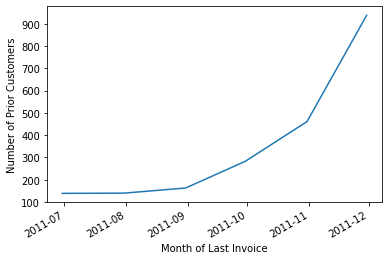

In [20]:
# This code computes the churn rate
# it also explores the churn rate for customers, who have more than 1 invoice
import pandas as pd
import matplotlib.pyplot as plt
draw=True
verbose=False
def GetInvoicesPerCustomer(df_all_customers,df):
    # Collect all invoices per customer
    df_customer_invoice = df.groupby(['Customer ID','Invoice','InvoiceDate'], dropna=True).sum()
    dfID = {}
    for ide in df_all_customers:
        dfID[ide] = [len(df_customer_invoice[df_customer_invoice.index.get_level_values(0)==ide])]
    return pd.DataFrame.from_dict(dfID, orient='index', columns=['Invoices'])

# read in file
df = pd.read_csv('online_combined.csv')
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

# add the total amount spent
df['totalcost'] = df['Price']*df['Quantity']

# The churn rate for the second half of 2011 is 47%. This is 2366 customers.
# customers before June 2011
mask = (df['InvoiceDate'] < '2011-6-1')
df_beforeJune2011=df.loc[mask]
mask = (df['InvoiceDate'] >= '2011-6-1')
df_afterJune2011=df.loc[mask]

# build list of customers before and after June 2011.
df_before_customers = df_beforeJune2011['Customer ID'].unique()
df_all_customers = df['Customer ID'].unique()
df_after_customers = df_afterJune2011['Customer ID'].unique()
n_before_customers = len(df_before_customers)
print('')
print('Total customers before June 2011: %s' %n_before_customers)
print('Total customers after June 2011: %s' %len(df_after_customers))
print('')

#
# Compute the churn rate
#
churn_customers=0
new_customers=0
for ide in df_before_customers:
    if not (ide in df_after_customers):
        churn_customers+=1
for ide in df_after_customers:
    if not (ide in df_before_customers):
        new_customers+=1
print('')
print('Churned customers: %s new customers: %s Churn rate: %s' %(churn_customers,new_customers, 100*(churn_customers/n_before_customers)))
print('')

#
# I was interested how much lower the churn rate is for customers who had more than one prior invoice
#
# If we select customers who have more than 1 invoice, then the churn rate is 37%
print('If we select customers who have more than 1 invoice, then the churn rate is 37\%')
df_ID_Ninvoice        = GetInvoicesPerCustomer(df_all_customers,df)
df_ID_Ninvoice_before = GetInvoicesPerCustomer(df_before_customers,df_beforeJune2011)
df_ID_Ninvoice_after  = GetInvoicesPerCustomer(df_after_customers,df_afterJune2011)
if verbose:
    print(df_ID_Ninvoice)
churn_customers_mto=0
customers_more_than_oneInv_before = df_ID_Ninvoice_before[df_ID_Ninvoice_before['Invoices']>1].index.unique()
n_customers_more_than_oneInv_before = len(customers_more_than_oneInv_before)
for ide in customers_more_than_oneInv_before:
    if not (ide in df_after_customers):
        churn_customers_mto+=1        
print('')
print('Customers with more than 1 Invoice rates - Churned customers: %s Churn rate: %s' %(churn_customers_mto, 100*(churn_customers_mto/n_customers_more_than_oneInv_before)))
print('')
#
# Are there customers close to churning? Going back to all customers and not just the ones with more than one invoice prior to June 2011. This I plot as the time since their last invoice, and I plot it as the number versus the month
#
# Grouping customers per month
print('Are there customers close to churning? Going back to all customers and not just the ones with more than one invoice prior to June 2011. This I plot as the time since their last invoice, and I plot it as the number versus the month')
i = pd.date_range('2011-06-01', periods=6, freq='1M')
df_customer_invoice_after = df_afterJune2011.groupby(['Customer ID','Invoice','InvoiceDate'], dropna=True).sum()
if verbose:
    print(df_customer_invoice_after)
lastInvoice = []
for ide in df_before_customers:
    if ide in df_after_customers:
        df_thiscustomer = df_customer_invoice_after[df_customer_invoice_after.index.get_level_values(0)==ide] #['InvoiceDate'][-1]
        last_invoice =df_thiscustomer.index.get_level_values(2).sort_values()[-1]
        lastInvoice+=[last_invoice]
        # if you want to print customers at risk of churning, then turn verbose to true
        if last_invoice.month<9 and verbose:
            print('Last purchase was before september. At risk of churning: %s' %ide)
monthly_last_invoice=[]
timeList=[]
for d in i:
    timeList+=[d]
    nmonth=0
    for itime in lastInvoice:
        if d.month==itime.month:
            nmonth+=1
    monthly_last_invoice+=[nmonth]

#
# Customers who have not ordered since July, August, or September are from highest to lowest priority to churn. A targeted campaign to advertise to only these customers could be put together. Trying to encourage them to buy, especially near the December holidays. Fortunately, the number of customers with their last invoice in July-September is small compared to those more recent. However, the orders are very holiday driven with more invoices near the December.
#
print('')
print('Customers who have not ordered since July, August, or September are from highest to lowest priority to churn. A targeted campaign to advertise to only these customers could be put together. Trying to encourage them to buy, especially near the December holidays. Fortunately, the number of customers with their last invoice in July-September is small compared to those more recent. However, the orders are very holiday driven with more invoices near the December.')
if draw:
    plt.plot(list(timeList),list(monthly_last_invoice))
    plt.gcf().autofmt_xdate()
    plt.ylabel('Number of Prior Customers')
    plt.xlabel('Month of Last Invoice')
    plt.show()
        


In [26]:
# as a bit of a bonus, I started looking into sorting items using Spacey in a limited way.
# there is a lot of printout, but it gets to the most used words. There is still some more sorting to be done.
# This could be greatly extended to build a better customer profile.
# It takes a little while to run. You can shorten the number of entries:
maxEntries = 100 # -1 runs all entries

# These are the most used items in the Description. 
# Given more time, I would try to build a customer portfolio 
# of the types of tiems that were purchased. This would be more involved, 
# but I could imagine doing target advertising. I could also imagine grouping 
# these items by customer to look for what was purchased by customers with 
# similar purchases. Then suggest these new items to the client.


import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def occurrences(string, sub):
    count = start = 0
    while True:
        start = string.find(sub, start) + 1
        if start > 0:
            count+=1
        else:
            return count
        
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# make sure you download python -m spacy download en_core_web_sm
df = pd.read_csv('online_combined.csv')
# group items
i=0
wordOccMap = {}
uniq_df = df['Description'].dropna().unique()
for d in uniq_df:
    #print(d)
    words = d.split(' ')
    
    for w in words:
        if w=='':
            continue
        # check what the words are
        doc = nlp(d)
        # select nouns
        if  len([chunk.text for chunk in doc.noun_chunks])>0:
            pass
        # skip adj
        if  len([token.lemma_ for token in doc if token.pos_ == "ADJ"])>0:
            continue
        if w in ['IN','AND','OF','SET',',','&','+']:
            continue
        if w.isdigit():
            continue
        if w not in wordOccMap:
            wordOccMap[w]=0
        for diter in uniq_df:
            if diter==d:
                continue
            if occurrences(diter,w)>0:
                wordOccMap[w]+=1

    doc = nlp(d)  
    i+=1
    if i>maxEntries and maxEntries>0:
        break

dfwords = pd.DataFrame.from_dict(wordOccMap, orient='index', columns=['entries'])
print(dfwords)
print(dfwords.sort_values(by='entries'))

# These are the most used items in the Description. Given more time, I would try to build a customer portfolio of the types of tiems that were purchased. This would be more involved, but I could imagine doing target advertising. I could also imagine grouping these items by customer to look for what was purchased by customers with similar purchases. Then suggest these new items to the client.
print('iteration:  ')
for index, row in dfwords.sort_values(by='entries').iterrows():
    print('%s %s' %(index,row['entries']))


           entries
15CM             1
CHRISTMAS     1194
GLASS          243
BALL            96
LIGHTS         192
...            ...
CARD           664
BANQUET          1
SPACE           52
BOY             59
RING           212

[192 rows x 1 columns]
              entries
HOTTIE              0
PATROLLED           0
RAINY               0
MARSHMALLOWS        0
LADDERS             0
...               ...
BOX              1332
RED              1364
PINK             1419
BLUE             1460
HEART            1845

[192 rows x 1 columns]
iteration:  
HOTTIE 0
PATROLLED 0
RAINY 0
MARSHMALLOWS 0
LADDERS 0
SNAKES 0
EUCALYPTUS 0
HEART. 0
FIGURES 0
PINECONE 0
MARIA 0
TOMATO 1
EMILY 1
15CM 1
CINAMMON 1
JOY 1
AREA 1
ROSIE 1
CHASING 1
COUNTRY 1
POSTAGE 1
BANQUET 1
WRAPS 1
LADIES 2
WOOLLY 2
SAVE 2
PLANET 2
DINOSAURS 2
PLEASE 2
TOYS 2
BLACK/BLUE 2
WASTEPAPER 2
CARROT 2
GUNS 3
THREE 3
WRITING 3
CIGAR 4
RED/WHITE 5
ADVENT 5
MONSTER 5
DUCKS 6
DOVE 6
PEACE 6
PEGS 6
PERSON 6
BUILDING 6
RUFFLED 6
BEAR 7
T